## 1. Problem Framing

The goal of this project was to develop a sentiment model that could accurately predict the sentiment of the text uploaded to a website. The dataset contained random texts and their emotions, and the task was to classify texts to one of the predified categories

To achieve this, a series of steps were followed such as data acquisition, data preprocessing and cleaning to prepare the data for modeling. Feature engineering was then performed to extract relevant features from the text, and the best model and hyperparameters were selected to train the classification model.

Once the model was trained, its performance was evaluated on a test dataset and fine-tuned as necessary. Finally, the model was integrated into a web application, allowing users to write text to the website and receive predictions about the sentiment of the text.

The success of the project was determined by the accuracy and efficiency of the model in classifying the text.

## 2. Data Aquisition
To acquire the necessary data for the project, [dataset](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis) was downloaded from kaggle

## 3. Data Preprocessing, Cleaning and Feature Engineering
Data preprocessing and cleaning are the most important parts of the data science process. Spacy was used to filter stop words and punctuations from the texts. For feature engineering tfid vectorizer was used which was included in the pipeline itself.


In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [2]:
with open('dataset/data.txt', 'r') as file:
    data = file.readlines()

data = [line.strip().split(';') for line in data]

df = pd.DataFrame(data, columns=['text', 'emotion'])

print(df.head())

                                                text  emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness


In [3]:
df["emotion"].unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise', None],
      dtype=object)

In [4]:
df['emotion'].isna().sum()

1

In [5]:
df= df.dropna()

In [6]:
df["emotion"].unique()

array(['sadness', 'joy', 'fear', 'anger', 'love', 'surprise'],
      dtype=object)

In [7]:
emotion_class = {'anger':0, 'sadness':1, 'fear':2, 'surprise':3, 'joy':4, 'love':5}

In [8]:
df['label'] = df['emotion'].map(emotion_class)
df

,text,emotion,label
0,im feeling rather rotten so im not very ambiti...,sadness,1
1,im updating my blog because i feel shitty,sadness,1
2,i never make her separate from me because i do...,sadness,1
3,i left with my bouquet of red and yellow tulip...,joy,4
4,i was feeling a little vain when i did this one,sadness,1
...,...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness,1
19996,i constantly worry about their fight against n...,joy,4
19997,i feel its important to share this info for th...,joy,4
19998,i truly feel that if you are passionate enough...,joy,4


<Axes: xlabel='emotion', ylabel='count'>

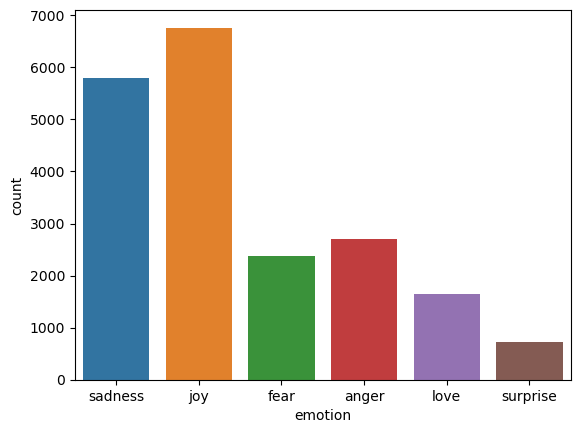

In [9]:
sns.countplot(data=df, x='emotion')

In [10]:
import spacy

nlp = spacy.load("en_core_web_lg") 


def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens) 

2023-03-28 20:31:32.574495: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
df['prepocessed_text']= df['text'].apply(preprocess)

In [12]:
df

,text,emotion,label,prepocessed_text
0,im feeling rather rotten so im not very ambiti...,sadness,1,m feel rotten m ambitious right
1,im updating my blog because i feel shitty,sadness,1,m update blog feel shitty
2,i never make her separate from me because i do...,sadness,1,separate don t want feel like m ashamed
3,i left with my bouquet of red and yellow tulip...,joy,4,leave bouquet red yellow tulip arm feel slight...
4,i was feeling a little vain when i did this one,sadness,1,feel little vain
...,...,...,...,...
19995,im having ssa examination tomorrow in the morn...,sadness,1,m have ssa examination tomorrow morning m prep...
19996,i constantly worry about their fight against n...,joy,4,constantly worry fight nature push limit inner...
19997,i feel its important to share this info for th...,joy,4,feel important share info experience thing
19998,i truly feel that if you are passionate enough...,joy,4,truly feel passionate stay true succeed


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['prepocessed_text'], df['label'], train_size=0.8, random_state=47, stratify=df['label'])

In [14]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(16000,) (16000,)
(4000,) (4000,)


# 4. Model Training and Evaluation
Since, Random Forest Classifier does the best job in multiclass classifying, it was used for training. GridSearchCV was used for hyperparameter tuning. The model was evaluated using metrics such as accuracy, precision, recall, and F1-score. Additionally, a confusion matrix was created. Finally, the model was saved for backend use.


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        
     ('Random Forest', RandomForestClassifier())         
])


param_grid = {
    'Random Forest__n_estimators': [50, 100, 200],
    'Random Forest__max_depth': [5, 10, 20]
}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# pipeline.set_params(**grid_search.best_params_)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('Random Forest', RandomForestClassifier())])

In [24]:
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       542
           1       0.90      0.89      0.89      1159
           2       0.81      0.85      0.83       475
           3       0.78      0.66      0.71       144
           4       0.85      0.91      0.88      1352
           5       0.79      0.63      0.70       328

    accuracy                           0.86      4000
   macro avg       0.83      0.80      0.81      4000
weighted avg       0.86      0.86      0.85      4000



In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 455,   32,   17,    1,   32,    5],
       [  23, 1033,   29,    3,   64,    7],
       [  12,   29,  403,   10,   19,    2],
       [   2,    3,   34,   95,    9,    1],
       [  17,   38,   12,   11, 1233,   41],
       [   6,   16,    0,    2,   97,  207]])

In [26]:
import joblib 
joblib.dump(pipeline, 'model1.pkl')

['model1.pkl']

Text(95.72222222222221, 0.5, 'Truth')

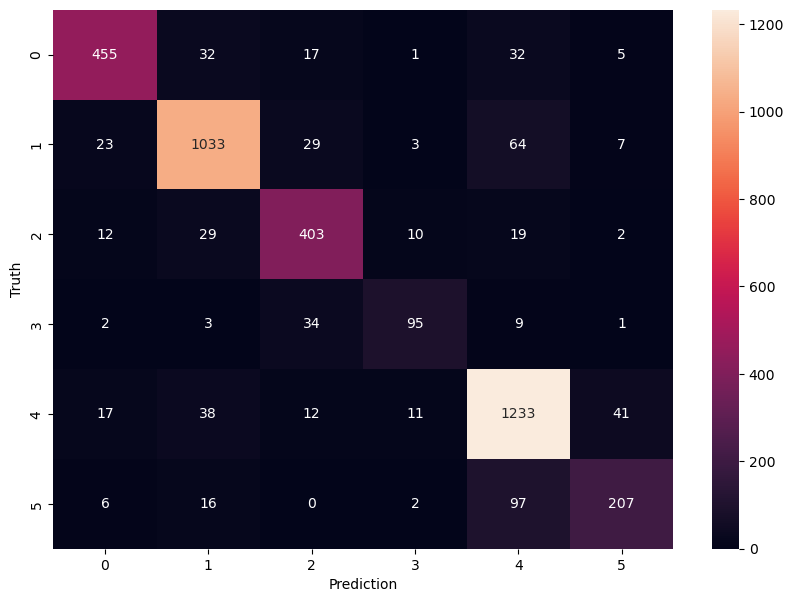

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [28]:
def key_from_value(dictionary, value):
    for key in dictionary:
        if dictionary[key] == value:
            return key

In [29]:
def predict(model, text):
    prepocessed_text = preprocess(text)
    pred_value = model.predict([prepocessed_text])
    pred = key_from_value(emotion_class, pred_value)
    return pred

In [30]:
predict(pipeline, 'I am happy.')

'joy'